In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [2]:
df = pd.read_csv('Spam Email raw text for NLP.csv').drop('FILE_NAME', axis=1)
df

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


EDA

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

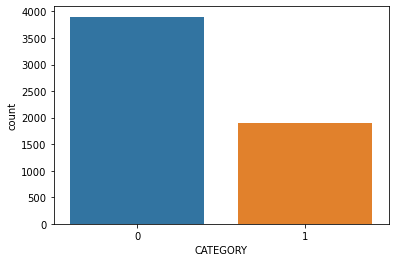

In [3]:
sns.countplot(data=df, x='CATEGORY')

In [4]:
#PCC

In [5]:
# import nltk
# nltk.download('punkt')
# words = [' '.join(word_tokenize(x.lower())) for x in df['MESSAGE']]

In [6]:
tokenizer = RegexpTokenizer(r'[^0-9\s,\.\-\?!:;\(\)\"\"\#\$\%\&\*><\/]+')

words = [' '.join(tokenizer.tokenize(x.lower())) for x in df['MESSAGE']]

In [7]:
df['clean'] = words
df

,CATEGORY,MESSAGE,clean
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates are at their low...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,attention this is a must for all computer user...
2,1,This is a multi-part message in MIME format.\n...,this is a multi part message in mime format =_...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information the new domain names are...
4,1,This is the bottom line. If you can GIVE AWAY...,this is the bottom line if you can give away c...
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",i'm one of the but it's not working very well ...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted w c approves html 'emotit...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",on mon at che wrote thats the correct lines to...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",once upon a time manfred wrote i would like to...


Bag of Words

In [8]:
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(df['clean'])

feature_names = vectorizer.vocabulary_.keys()
df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=feature_names)
df_bow

,dear,homeowner,rates,lowest,point,years,help,best,rate,situation,...,neuroscience,muldentalweg,ribbon,campain,bennewitz,interpreters,rockall,funniness,dimv,initialize
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting of Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_bow, df.CATEGORY, test_size=0.25, stratify=df.CATEGORY)

In [14]:
classifier = MultinomialNB(alpha=0.000000001)
classifier.fit(X_train, y_train)
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print(f'train score = {train_score}')
print(f'test score = {test_score}')

train score = 0.9974695192086497
test score = 0.9641131815044859


In [52]:
pd.DataFrame(np.exp(classifier.feature_log_prob_), columns=feature_names).loc[:,list(df_bow.loc[2,:][df_bow.loc[2,:]!=0].index)].sum(axis=1)

0    0.067508
1    0.284692
dtype: float64

In [53]:
y_train[2]

1

In [41]:
np.exp(np.log(0.11764))

0.11764

In [51]:
df_bow.loc[2,:][df_bow.loc[2,:]!=0]

guesswork      3
lunch          1
competetion    1
reduction      2
advertisers    2
              ..
vmailmgr       1
tudab          2
ycwodq         6
geoff          2
tradeoff       2
Name: 2, Length: 130, dtype: Sparse[int64, 0]

In [23]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")[['v1', 'v2']]
df.columns = ['label', 'message']
label = {'ham':0, 'spam':1}
df['label'] = df['label'].map(label)
df


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='label', ylabel='count'>

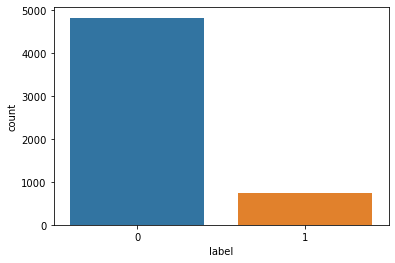

In [24]:
sns.countplot(data=df, x='label')